<a href="https://colab.research.google.com/github/hemzadev/shared-notebooks/blob/main/idcardsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Fine-Tuning YOLO for ID Card and Field Detection
# Description: This notebook fine-tunes a YOLO model to detect ID cards and their fields.

# =============================================
# 1. Setup and Installation
# =============================================

In [ ]:
# Install required libraries
!pip install ultralytics
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
# Import libraries
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display

# =============================================
# 2. Prepare Dataset
# =============================================

In [5]:
# Upload your dataset.zip file to Google Colab
# (Use the file uploader or Google Drive)
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Unzip the dataset
!unzip '/content/drive/My Drive/datasets/dataset.zip' -d /content/

Archive:  /content/drive/My Drive/datasets/dataset.zip
   creating: /content/dataset/
  inflating: /content/dataset/classes.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/images/
   creating: /content/dataset/images/test/
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_100.png  
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_82.png  
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_83.png  
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_84.png  
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_85.png  
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_86.png  
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_87.png  
  inflating: /content/dataset/images/test/augmented_id_card_template2_females_88.png  
  inflating: /content/dataset/images/test/augmente

In [11]:
# Verify the dataset structure
dataset_path = "/content/dataset"
print("Dataset structure:")

# Function to print directory structure
def print_directory_structure(path, indent=""):
    if os.path.isdir(path):
        print(f"{indent}{os.path.basename(path)}/")
        indent += "    "
        for item in os.listdir(path):
            item_path = os.path.join(path, item)
            print_directory_structure(item_path, indent)
    else:
        print(f"{indent}{os.path.basename(path)}")

# Print the structure
print_directory_structure(dataset_path)

Dataset structure:
dataset/
    data.yaml
    labels/
        train/
            augmented_id_card_template2_males_32.txt
            augmented_id_card_template2_males_38.txt
            augmented_id_card_template2_females_5.txt
            augmented_id_card_template2_males_16.txt
            id_card_template2_females_53.txt
            augmented_id_card_template2_females_23.txt
            augmented_id_card_template2_females_27.txt
            augmented_id_card_template2_females_44.txt
            id_card_template2_females_63.txt
            augmented_id_card_template2_males_27.txt
            augmented_id_card_template2_females_96.txt
            id_card_template2_males_11.txt
            augmented_id_card_template2_males_21.txt
            augmented_id_card_template2_males_55.txt
            id_card_template2_males_12.txt
            id_card_template2_females_91.txt
            id_card_template2_females_57.txt
            id_card_template2_females_26.txt
            id_card_template

# =============================================
# 3. Load and Inspect the YOLO Model
# =============================================


In [12]:
# Load a pre-trained YOLO model (e.g., YOLOv8n)
model = YOLO('yolov8n.pt')  # You can use 'yolov8s', 'yolov8m', etc.

100%|██████████| 6.25M/6.25M [00:00<00:00, 95.1MB/s]


In [13]:
# Inspect the model architecture
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

# =============================================
# 4. Train the Model
# =============================================

In [14]:
# Define training parameters
epochs = 50
imgsz = 640
batch = 16
data_yaml = "/content/dataset/data.yaml"

In [15]:
# Start training
results = model.train(data=data_yaml, epochs=epochs, imgsz=imgsz, batch=batch)

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 17.1MB/s]


Overriding model.yaml nc=80 with nc=17

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/labels/train... 280 images, 0 backgrounds, 111 corrupt: 100%|██████████| 280/280 [00:00<00:00, 423.79it/s]

train: WARNING ⚠️ /content/dataset/images/train/augmented_id_card_template2_females_1.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
train: WARNING ⚠️ /content/dataset/images/train/augmented_id_card_template2_females_10.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
train: WARNING ⚠️ /content/dataset/images/train/augmented_id_card_template2_females_11.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
train: WARNING ⚠️ /content/dataset/images/train/augmented_id_card_template2_females_12.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
train: WARNING ⚠️ /content/dataset/images/train/augmented_id_card_template2_females_13.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
train: WARNING ⚠️ /content/dataset/images/train/augmented_id_card_template2_females_14.png: ignoring 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/labels/val... 80 images, 0 backgrounds, 20 corrupt: 100%|██████████| 80/80 [00:00<00:00, 545.86it/s]

val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_64.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_65.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_66.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_67.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_68.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_69.png: ignoring corrupt image/label: no

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.754      4.391      1.486        303        640: 100%|██████████| 11/11 [03:01<00:00, 16.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.10s/it]

                   all         60       1020          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.448      4.086      1.322        357        640: 100%|██████████| 11/11 [02:38<00:00, 14.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.98s/it]

                   all         60       1020      0.167      0.157      0.166      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.283      3.659      1.237        283        640: 100%|██████████| 11/11 [02:36<00:00, 14.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.88s/it]

                   all         60       1020     0.0328      0.183      0.157       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.145      2.951      1.165        277        640: 100%|██████████| 11/11 [02:40<00:00, 14.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.09s/it]

                   all         60       1020     0.0945      0.447      0.366      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.078       2.35      1.094        237        640: 100%|██████████| 11/11 [02:39<00:00, 14.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.58s/it]

                   all         60       1020      0.715      0.659      0.601      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.9876      1.905      1.041        325        640: 100%|██████████| 11/11 [02:39<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.76s/it]

                   all         60       1020       0.89      0.432      0.762      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.8987      1.448      1.015        253        640: 100%|██████████| 11/11 [02:41<00:00, 14.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.04s/it]

                   all         60       1020      0.872      0.501      0.868      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.8726      1.199      1.005        257        640: 100%|██████████| 11/11 [02:38<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.44s/it]

                   all         60       1020      0.949      0.722      0.939      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.7943      1.052     0.9787        324        640: 100%|██████████| 11/11 [02:37<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.47s/it]

                   all         60       1020      0.929       0.87      0.961      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.7388     0.9183       0.97        277        640: 100%|██████████| 11/11 [02:40<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.81s/it]

                   all         60       1020      0.938      0.989      0.991       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.7315     0.8509     0.9644        288        640: 100%|██████████| 11/11 [02:38<00:00, 14.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.21s/it]

                   all         60       1020      0.976      0.988      0.994      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7115     0.8343     0.9484        335        640: 100%|██████████| 11/11 [02:40<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.11s/it]

                   all         60       1020      0.954      0.981      0.993      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.6719     0.7839     0.9349        344        640: 100%|██████████| 11/11 [02:40<00:00, 14.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.19s/it]

                   all         60       1020      0.968      0.992      0.993      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.6389     0.7472     0.9335        238        640: 100%|██████████| 11/11 [02:37<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.00s/it]

                   all         60       1020      0.983      0.998      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.6138     0.7075     0.9247        235        640: 100%|██████████| 11/11 [02:38<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.21s/it]

                   all         60       1020      0.989      0.998      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.5819     0.6869     0.9165        292        640: 100%|██████████| 11/11 [02:44<00:00, 14.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.67s/it]

                   all         60       1020       0.99          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.5663     0.6652     0.9131        299        640: 100%|██████████| 11/11 [02:39<00:00, 14.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.99s/it]

                   all         60       1020      0.989      0.999      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.5644     0.6615     0.9055        265        640: 100%|██████████| 11/11 [02:39<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.55s/it]

                   all         60       1020      0.983      0.998      0.995      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.5475      0.634     0.9046        290        640: 100%|██████████| 11/11 [02:38<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.74s/it]

                   all         60       1020      0.991      0.999      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.5367     0.6137     0.8994        280        640: 100%|██████████| 11/11 [02:39<00:00, 14.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.62s/it]

                   all         60       1020      0.979      0.997      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.5346       0.61     0.9044        418        640: 100%|██████████| 11/11 [02:38<00:00, 14.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all         60       1020      0.989      0.997      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.5066     0.5879     0.8924        297        640: 100%|██████████| 11/11 [02:39<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.04s/it]

                   all         60       1020      0.985      0.997      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.5025     0.5865      0.894        343        640: 100%|██████████| 11/11 [02:38<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.81s/it]

                   all         60       1020      0.993      0.998      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.5253     0.5796     0.8911        250        640: 100%|██████████| 11/11 [02:40<00:00, 14.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all         60       1020      0.993      0.997      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.4954     0.5698     0.8967        218        640: 100%|██████████| 11/11 [02:38<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.16s/it]

                   all         60       1020      0.995          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.4872     0.5587     0.8896        335        640: 100%|██████████| 11/11 [02:42<00:00, 14.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.58s/it]

                   all         60       1020      0.994      0.998      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.4783     0.5522     0.8885        234        640: 100%|██████████| 11/11 [02:37<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.18s/it]

                   all         60       1020      0.992          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.4852     0.5576     0.8849        221        640: 100%|██████████| 11/11 [02:39<00:00, 14.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.46s/it]

                   all         60       1020      0.991      0.998      0.994      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.4802     0.5564     0.8851        238        640: 100%|██████████| 11/11 [02:37<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.80s/it]

                   all         60       1020      0.993          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.5035     0.5508     0.8801        232        640: 100%|██████████| 11/11 [02:37<00:00, 14.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.93s/it]

                   all         60       1020      0.993          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      0.501     0.5477      0.879        342        640: 100%|██████████| 11/11 [02:38<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.02s/it]

                   all         60       1020      0.994      0.999      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.4842       0.53     0.8803        289        640: 100%|██████████| 11/11 [02:38<00:00, 14.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.87s/it]

                   all         60       1020      0.994          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.4862     0.5333      0.884        344        640: 100%|██████████| 11/11 [02:38<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.03s/it]

                   all         60       1020      0.993          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.4613     0.5223     0.8817        321        640: 100%|██████████| 11/11 [02:41<00:00, 14.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.05s/it]

                   all         60       1020      0.994      0.999      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.4479     0.5205     0.8738        255        640: 100%|██████████| 11/11 [02:43<00:00, 14.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.69s/it]

                   all         60       1020      0.996          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.4378     0.5108     0.8776        320        640: 100%|██████████| 11/11 [02:41<00:00, 14.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.45s/it]

                   all         60       1020      0.996          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.4441     0.5183     0.8727        315        640: 100%|██████████| 11/11 [02:39<00:00, 14.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.87s/it]

                   all         60       1020      0.995          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.4421     0.5173     0.8757        296        640: 100%|██████████| 11/11 [02:39<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.49s/it]

                   all         60       1020      0.995          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.4333     0.5079     0.8708        310        640: 100%|██████████| 11/11 [02:39<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all         60       1020      0.995          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.4217     0.5062     0.8653        346        640: 100%|██████████| 11/11 [02:38<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.54s/it]

                   all         60       1020      0.995          1      0.995      0.941


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4317     0.5535     0.8681        153        640: 100%|██████████| 11/11 [02:28<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.28s/it]

                   all         60       1020      0.992          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4217       0.52      0.859        152        640: 100%|██████████| 11/11 [02:33<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.55s/it]

                   all         60       1020      0.989          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.3793      0.485     0.8568        149        640: 100%|██████████| 11/11 [02:28<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.36s/it]

                   all         60       1020      0.992      0.999      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.3839     0.4868     0.8645        149        640: 100%|██████████| 11/11 [02:28<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.33s/it]

                   all         60       1020      0.994          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.3874     0.4847       0.85        151        640: 100%|██████████| 11/11 [02:31<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.98s/it]

                   all         60       1020      0.994          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.3591     0.4562     0.8478        151        640: 100%|██████████| 11/11 [02:26<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.76s/it]

                   all         60       1020      0.993      0.998      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.3504      0.451     0.8534        153        640: 100%|██████████| 11/11 [02:32<00:00, 13.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.08s/it]

                   all         60       1020      0.995      0.998      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.3645     0.4515     0.8409        153        640: 100%|██████████| 11/11 [02:28<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.01s/it]

                   all         60       1020      0.995          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.3495     0.4451     0.8527        149        640: 100%|██████████| 11/11 [02:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.73s/it]

                   all         60       1020      0.996          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.3385     0.4421     0.8466        149        640: 100%|██████████| 11/11 [02:30<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.83s/it]

                   all         60       1020      0.996          1      0.995       0.94



50 epochs completed in 2.477 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,963 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.88s/it]


                   all         60       1020      0.995          1      0.995      0.941
             FirstName         60         60      0.995          1      0.995      0.894
              LastName         60         60      0.999          1      0.995      0.912
       FirstNameArabic         60         60      0.997          1      0.995      0.862
        LastNameArabic         60         60      0.994          1      0.995      0.833
             BirthDate         60         60      0.996          1      0.995      0.884
            BirthPlace         60         60      0.997          1      0.995      0.855
      BirthPlaceArabic         60         60      0.997          1      0.995      0.928
        ExpirationDate         60         60      0.994          1      0.995      0.959
             CINNumber         60         60      0.994          1      0.995      0.994
           MainPicture         60         60      0.993          1      0.995      0.995
         SecondPictur

# =============================================
# 5. Evaluate the Model
# =============================================

In [16]:
# Validate the model on the validation set
metrics = model.val()  # This will generate metrics like mAP, precision, recall, etc.
print(metrics)

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,963 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/labels/val.cache... 80 images, 0 backgrounds, 20 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_64.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_65.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_66.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_67.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_68.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0327]
val: WARNING ⚠️ /content/dataset/images/val/augmented_id_card_template2_females_69.png: ignoring corrupt image/label: no


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:18<00:00,  4.57s/it]


                   all         60       1020      0.995          1      0.995      0.939
             FirstName         60         60      0.995          1      0.995      0.895
              LastName         60         60      0.999          1      0.995      0.909
       FirstNameArabic         60         60      0.996          1      0.995      0.862
        LastNameArabic         60         60      0.995          1      0.995      0.833
             BirthDate         60         60      0.996          1      0.995      0.877
            BirthPlace         60         60      0.994          1      0.995      0.844
      BirthPlaceArabic         60         60      0.998          1      0.995      0.934
        ExpirationDate         60         60      0.994          1      0.995      0.959
             CINNumber         60         60      0.994          1      0.995      0.985
           MainPicture         60         60      0.993          1      0.995      0.983
         SecondPictur

Training Metrics:


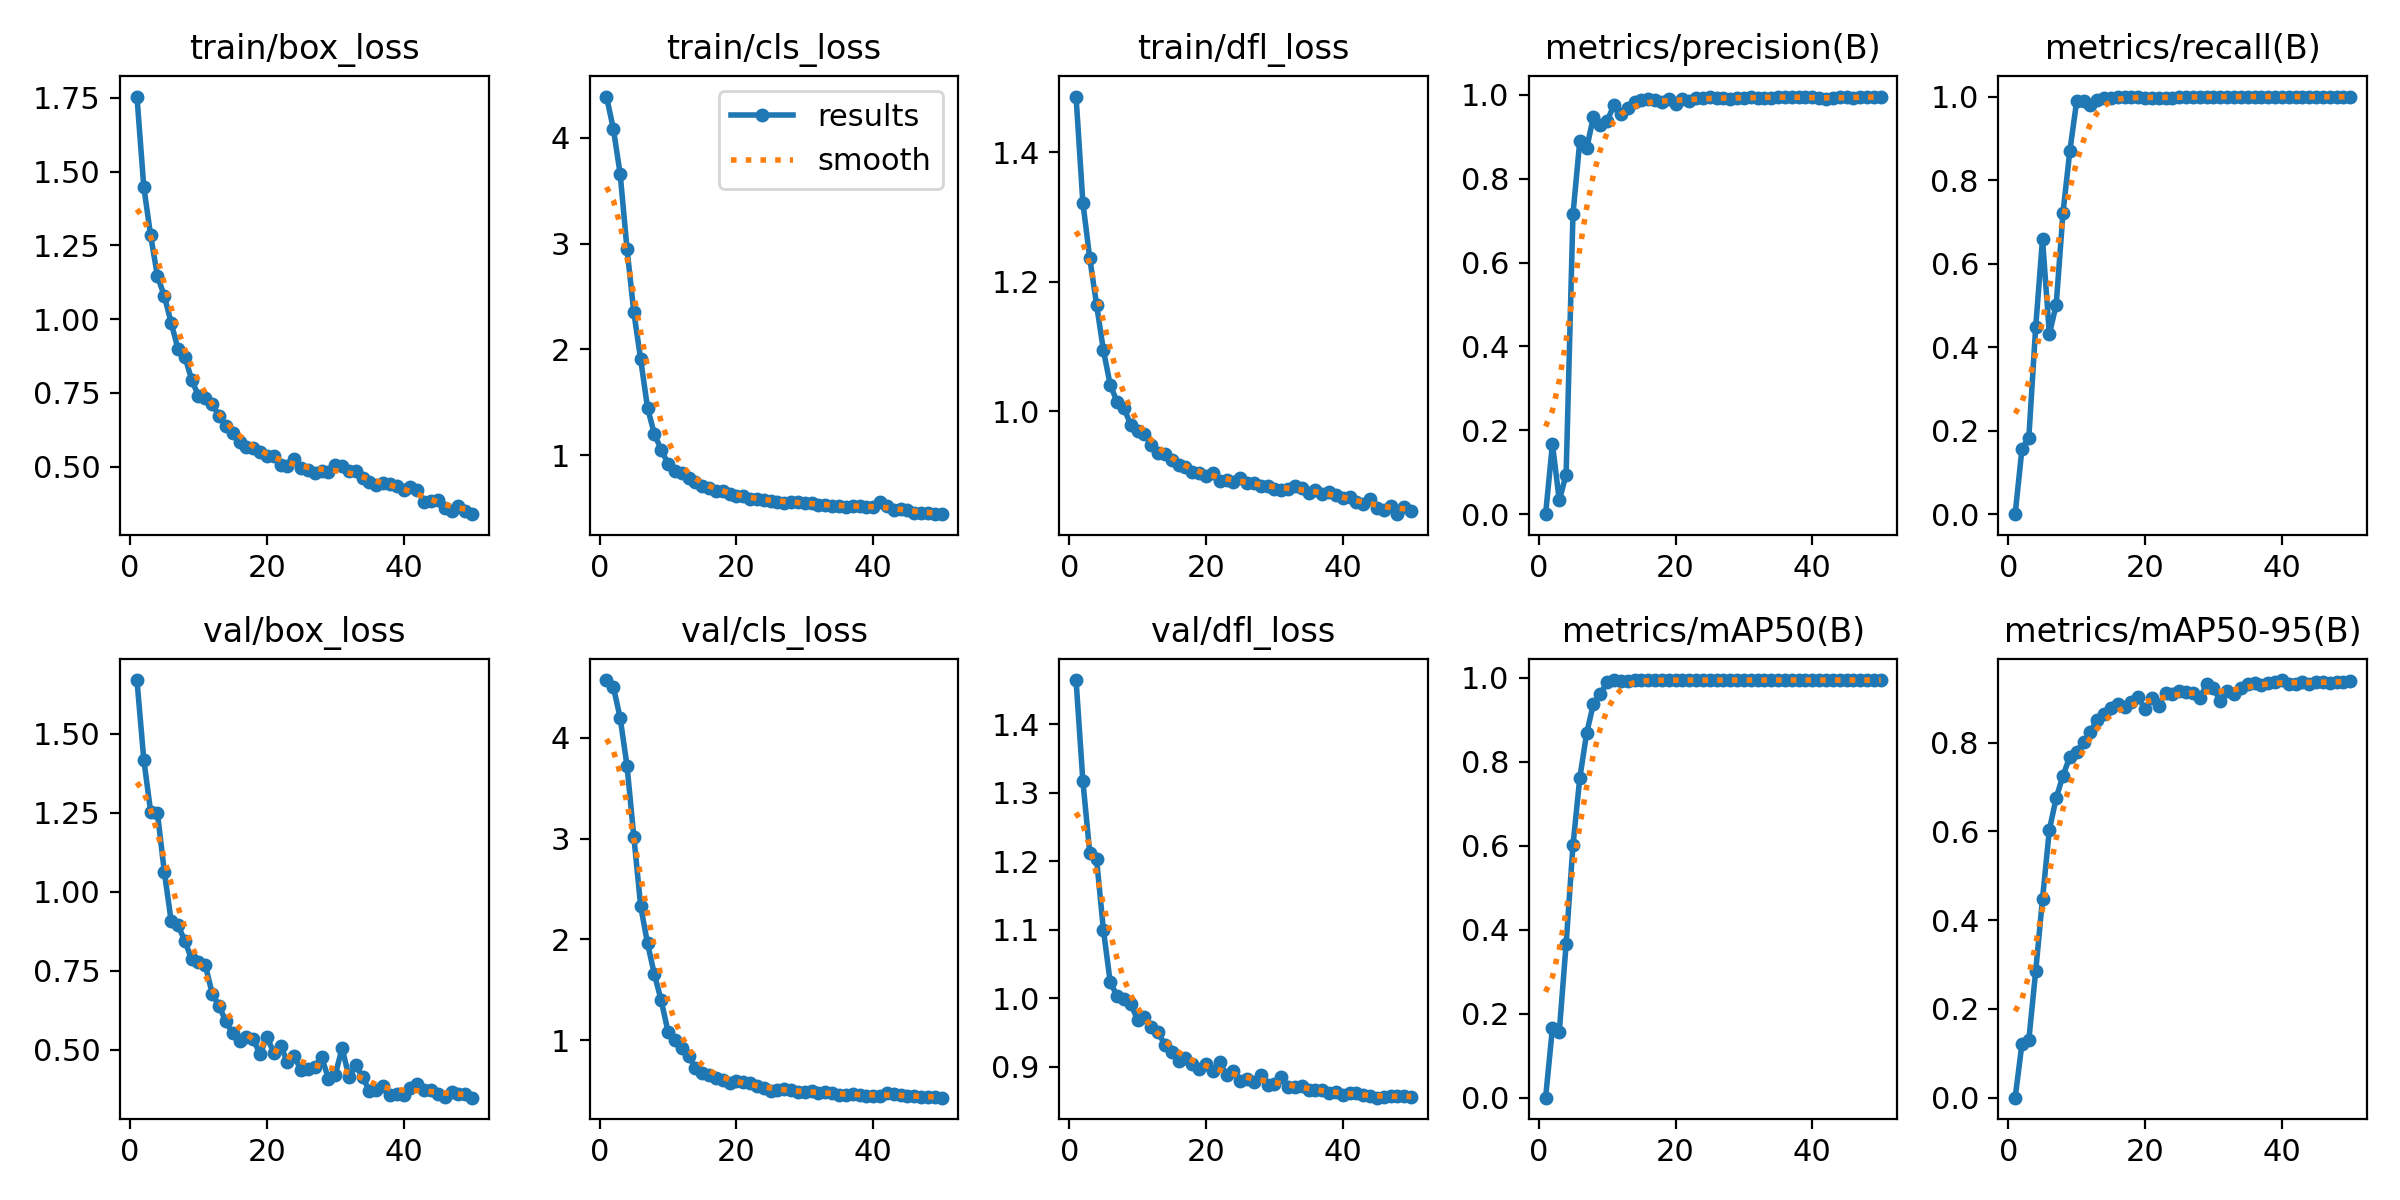

In [17]:
# Plot training metrics
results_path = "/content/runs/detect/train"  # Path to training results
metrics_file = os.path.join(results_path, "results.png")

if os.path.exists(metrics_file):
    print("Training Metrics:")
    display(Image(filename=metrics_file))
else:
    print("Training metrics plot not found.")

# =============================================
# 6. Visualize Predictions
# =============================================

In [18]:
# Test the model on a few validation images
val_images_path = "/content/dataset/images/val"
val_images = os.listdir(val_images_path)[:5]  # Select first 5 images for visualization

for image_name in val_images:
    image_path = os.path.join(val_images_path, image_name)
    results = model.predict(source=image_path, save=True, conf=0.5)  # Adjust confidence threshold
    predicted_image_path = f"/content/runs/detect/predict/{image_name}"
    if os.path.exists(predicted_image_path):
        print(f"Predictions for {image_name}:")
        display(Image(filename=predicted_image_path))
    else:
        print(f"No predictions found for {image_name}.")


image 1/1 /content/dataset/images/val/id_card_template2_females_81.png: 512x640 1 FirstName, 1 LastName, 1 FirstNameArabic, 1 LastNameArabic, 1 BirthDate, 1 BirthPlace, 1 BirthPlaceArabic, 1 ExpirationDate, 1 CINNumber, 1 MainPicture, 1 SecondPicture, 1 CardBox, 1 CrownBox, 1 MoroccanTextSignature, 1 DirectorFullName, 1 DirectorSignature, 1 MoroccanFlag, 305.2ms
Speed: 6.3ms preprocess, 305.2ms inference, 8.7ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/train3
No predictions found for id_card_template2_females_81.png.

image 1/1 /content/dataset/images/val/augmented_id_card_template2_females_70.png: 640x384 1 FirstName, 1 LastName, 1 FirstNameArabic, 1 LastNameArabic, 1 BirthDate, 1 BirthPlace, 1 BirthPlaceArabic, 1 ExpirationDate, 1 CINNumber, 1 MainPicture, 1 SecondPicture, 1 CardBox, 1 CrownBox, 1 MoroccanTextSignature, 1 DirectorFullName, 1 DirectorSignature, 1 MoroccanFlag, 155.0ms
Speed: 3.7ms preprocess, 155.0ms inference, 1.1ms postprocess per

# =============================================
# 7. Save and Export the Model
# =============================================

In [19]:
# Save the fine-tuned model
model.save("/content/fine_tuned_yolo.pt")

# Export the model to ONNX format (optional)
model.export(format="onnx")

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 21, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 167.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 244.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 241.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 144.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 227.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with

'runs/detect/train/weights/best.onnx'

# =============================================
# 8. Additional Visualizations (Optional)
# =============================================

In [ ]:
# Plot confusion matrix
confusion_matrix_path = os.path.join(results_path, "confusion_matrix.png")
if os.path.exists(confusion_matrix_path):
    print("Confusion Matrix:")
    display(Image(filename=confusion_matrix_path))
else:
    print("Confusion matrix not found.")

# Plot precision-recall curve
pr_curve_path = os.path.join(results_path, "PR_curve.png")
if os.path.exists(pr_curve_path):
    print("Precision-Recall Curve:")
    display(Image(filename=pr_curve_path))
else:
    print("Precision-recall curve not found.")

# =============================================
# 9. Cleanup (Optional)
# =============================================

In [ ]:
# Remove unnecessary files to free up space
!rm -rf /content/runs/detect/predict  # Remove prediction results
!rm -rf /content/dataset  # Remove dataset (if no longer needed)

# =============================================
# End of Notebook
# =============================================